In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout, BatchNormalization

from fastai.tabular import *
from fastai import *

In [0]:
train = pd.read_csv('Train_2.csv')
test = pd.read_csv('Test.csv')
riders = pd.read_csv('Riders.csv')

In [0]:
train = pd.merge(train, riders, on = 'Rider Id')
test = pd.merge(test, riders, on = 'Rider Id')

In [0]:
def numToDay(num):
  if num == 1:
    return 'Monday'
  elif num == 2:
    return 'Tuesday'
  elif num == 3:
    return 'wednesday'
  elif num == 4:
    return 'Thursday'
  elif num == 5:
    return 'Friday'
  elif num == 6:
    return 'Saturday'
  else:
    return 'Sunday'

train['Arrival at Pickup - Weekday (Mo = 1)'] = train['Arrival at Pickup - Weekday (Mo = 1)'].apply(numToDay)
train['Confirmation - Weekday (Mo = 1)'] = train['Confirmation - Weekday (Mo = 1)'].apply(numToDay)
train['Pickup - Weekday (Mo = 1)'] = train['Pickup - Weekday (Mo = 1)'].apply(numToDay)
train['Arrival at Destination - Weekday (Mo = 1)'] = train['Arrival at Destination - Weekday (Mo = 1)'].apply(numToDay)

test['Arrival at Pickup - Weekday (Mo = 1)'] = test['Arrival at Pickup - Weekday (Mo = 1)'].apply(numToDay)
test['Confirmation - Weekday (Mo = 1)'] = test['Confirmation - Weekday (Mo = 1)'].apply(numToDay)
test['Pickup - Weekday (Mo = 1)'] = test['Pickup - Weekday (Mo = 1)'].apply(numToDay)

In [0]:
pickup = pd.to_datetime(train['Pickup - Time'])
train['pickup hour'] = pickup.dt.hour
train['pickup minute'] = pickup.dt.minute
train['pickup second'] = pickup.dt.second

train['hr_sin'] = np.sin(train['pickup hour']*(2.*np.pi/24))
train['hr_cos'] = np.cos(train['pickup hour']*(2.*np.pi/24))

train['mn_sin'] = np.sin(train['pickup minute']*(2.*np.pi/60))
train['mn_cos'] = np.cos(train['pickup minute']-1*(2.*np.pi/60))

train['sc_sin'] = np.sin(train['pickup second']-1*(2.*np.pi/60))
train['sc_cos'] = np.cos(train['pickup second']-1*(2.*np.pi/60))

In [0]:
train = train[train['Distance (KM)'] < 35]
train = train[train['Time from Pickup to Arrival'] < 6500]

In [141]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,pickup hour,pickup minute,pickup second,hr_sin,hr_cos,mn_sin,mn_cos,sc_sin,sc_cos,harvsine
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,Friday,9:40:10 AM,9,Friday,10:04:47 AM,9,Friday,10:27:30 AM,9,Friday,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,10,27,30,0.500000,-0.866025,0.309017,-0.190570,-0.998743,0.050129,1.930333
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,Friday,3:41:30 PM,18,Friday,4:07:16 PM,18,Friday,4:13:37 PM,18,Friday,5:01:43 PM,20,24.5,NaN,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549,16,13,37,-0.866025,-0.500000,0.978148,0.946395,-0.720020,0.693953,13.357387
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,Friday,1:12:49 PM,31,Friday,1:20:02 PM,31,Friday,1:33:08 PM,31,Friday,2:16:43 PM,6,24.7,NaN,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549,13,33,8,-0.258819,-0.965926,-0.309017,0.091315,0.999147,-0.041287,4.485987
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,Tuesday,7:12:29 AM,2,Tuesday,7:35:24 AM,2,Tuesday,7:38:46 AM,2,Tuesday,8:28:32 AM,18,15.2,NaN,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549,7,38,46,0.965926,-0.258819,-0.743145,0.980821,0.942023,-0.335548,8.935273
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,Tuesday,10:42:24 AM,22,Tuesday,10:56:00 AM,22,Tuesday,10:59:40 AM,22,Tuesday,11:26:22 AM,7,19.2,NaN,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549,10,59,40,0.500000,-0.866025,-0.104528,-0.700299,0.810745,-0.585399,6.000848


In [114]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Arrival at Pickup - Day of Month,Pickup - Day of Month,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,pickup hour,pickup minute,pickup second,hr_sin,hr_cos,mn_sin,mn_cos,sc_sin,sc_cos
count,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,16797.000000,551.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,21155.000000,2.115500e+04,21155.000000,21155.000000,21155.000000
mean,2.752115,15.650910,3.240605,15.651052,15.651052,15.651052,15.651052,3.240747,9.465942,23.259201,7.914701,-1.281446,36.811270,-1.282722,36.811153,1549.382841,1691.810541,984.548759,13.882529,340.969322,12.876058,29.392531,29.333207,-0.174911,-0.775661,3.001912e-03,0.004709,0.021692,0.010815
std,0.625182,8.798343,1.567059,8.798314,8.798314,8.798314,8.798314,1.566992,5.573213,3.616419,17.104219,0.030448,0.037383,0.034388,0.044446,971.274746,1573.324986,646.480958,0.916754,402.765326,2.551919,17.325912,17.317293,0.551280,0.252713,7.063608e-01,0.709300,0.703724,0.710093
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.433256,36.653828,-1.430298,36.640266,1.000000,2.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000e+00,-0.998511,-0.998743,-0.998511
25%,3.000000,8.000000,2.000000,8.000000,8.000000,8.000000,8.000000,2.000000,5.000000,20.600000,1.050000,-1.300921,36.784605,-1.301201,36.785681,881.000000,557.000000,495.000000,13.600000,61.000000,11.000000,14.000000,14.000000,-0.707107,-0.965926,-6.691306e-01,-0.716942,-0.684332,-0.716942
50%,3.000000,15.000000,3.000000,15.000000,15.000000,15.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284407,36.807974,1367.000000,1212.000000,872.000000,14.000000,161.000000,13.000000,29.000000,29.000000,-0.258819,-0.866025,1.224647e-16,-0.041287,0.045708,-0.041287
75%,3.000000,23.000000,5.000000,23.000000,23.000000,23.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261255,36.829351,2035.000000,2311.000000,1234.000000,14.300000,495.000000,15.000000,44.000000,44.000000,0.258819,-0.707107,7.431448e-01,0.723084,0.713850,0.723084
max,4.000000,31.000000,7.000000,31.000000,31.000000,31.000000,31.000000,7.000000,34.000000,32.100000,99.100000,-1.147170,36.991046,-1.092160,37.010923,6452.000000,9756.000000,3764.000000,15.200000,2298.000000,23.000000,59.000000,59.000000,0.965926,1.000000,1.000000e+00,0.998955,0.999147,0.998955


In [115]:
test.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Arrival at Pickup - Day of Month,Pickup - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,15.621817,15.621817,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326,1717.032258,998.400113,13.883178,342.815789
std,0.624000,8.776650,1.580926,8.776650,8.776650,8.776650,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507,1628.842795,672.195000,0.846333,410.064334
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195,3.000000,99.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,8.000000,8.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546,534.000000,494.000000,13.600000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,15.000000,15.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927,1209.000000,872.000000,14.000000,157.000000
75%,3.000000,23.000000,5.000000,23.000000,23.000000,23.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195,2311.000000,1239.000000,14.300000,491.000000
max,4.000000,31.000000,7.000000,31.000000,31.000000,31.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958,9756.000000,3764.000000,15.200000,2298.000000


Null values only in temeratures and Precipitation in millimeters

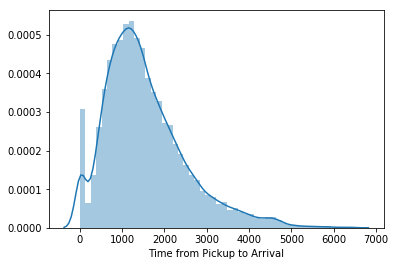

In [116]:
sns.distplot(train['Time from Pickup to Arrival'])

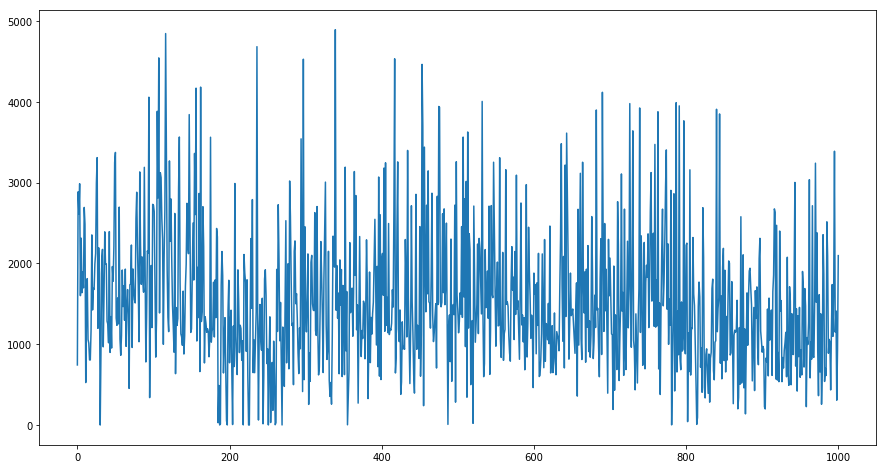

In [118]:
plt.figure(figsize=(15,8))
plt.plot(train.iloc[:1000,-14])

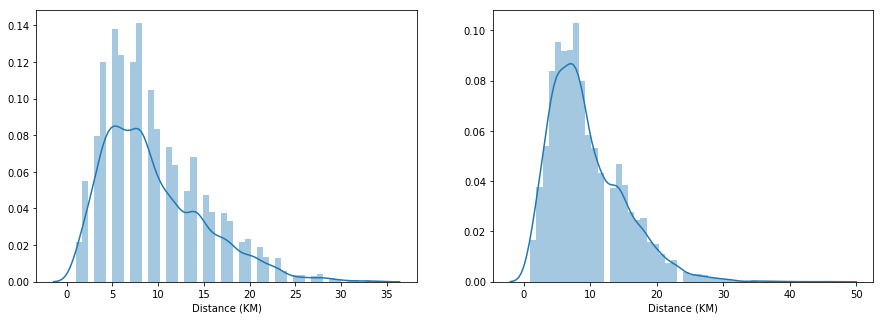

In [119]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.distplot(train['Distance (KM)'])
fig.add_subplot(1, 2, 2)
sns.distplot(test['Distance (KM)'])

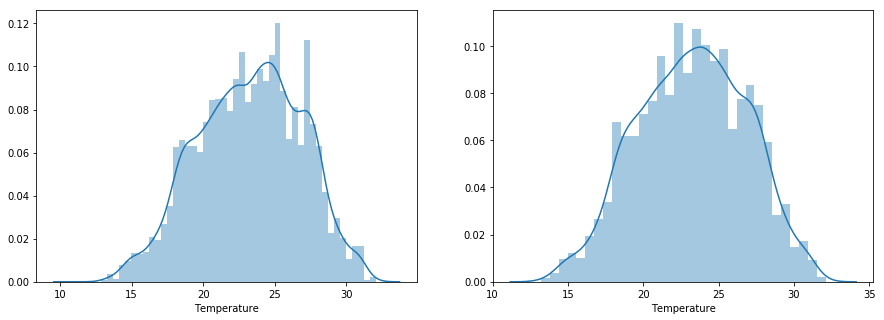

In [10]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.distplot(train['Temperature'].dropna())
fig.add_subplot(1, 2, 2)
sns.distplot(test['Temperature'].dropna())

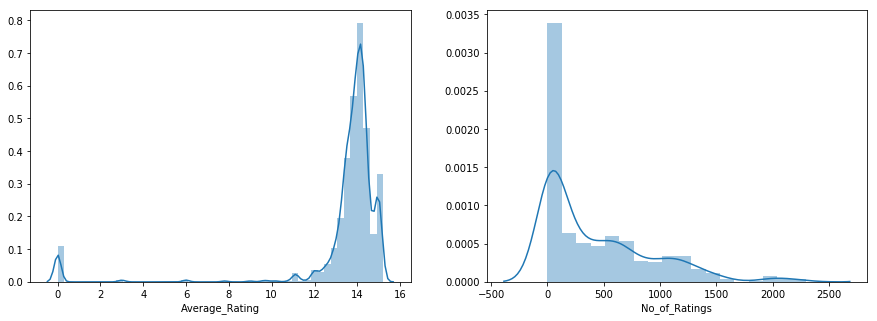

In [88]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.distplot(riders['Average_Rating'].dropna())
fig.add_subplot(1, 2, 2)
sns.distplot(riders['No_of_Ratings'].dropna())

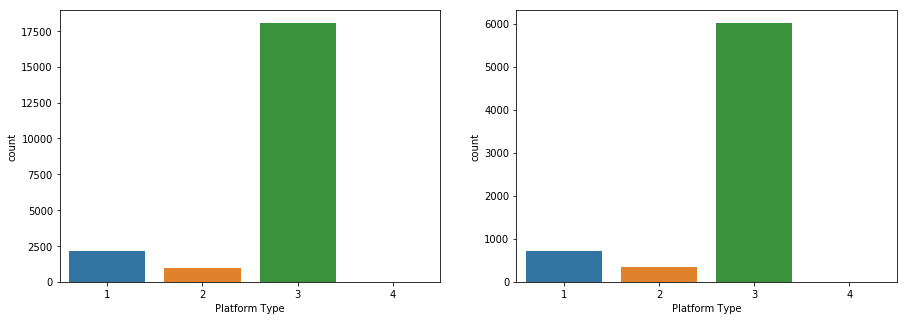

In [11]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.countplot(x = 'Platform Type', data = train)
fig.add_subplot(1, 2, 2)
sns.countplot(x = 'Platform Type', data = test)

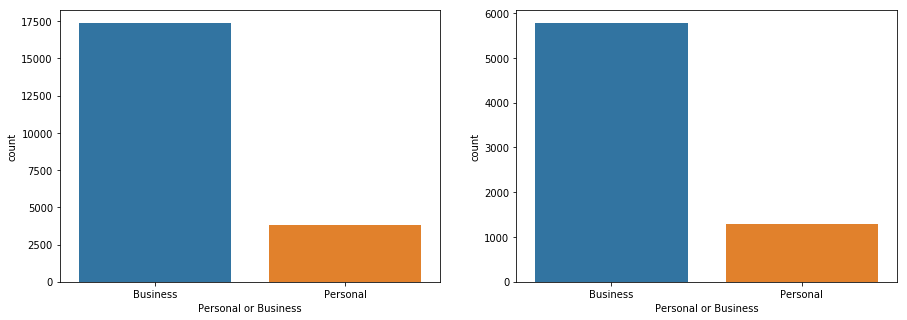

In [34]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.countplot(x = 'Personal or Business', data = train)
fig.add_subplot(1, 2, 2)
sns.countplot(x = 'Personal or Business', data = test)

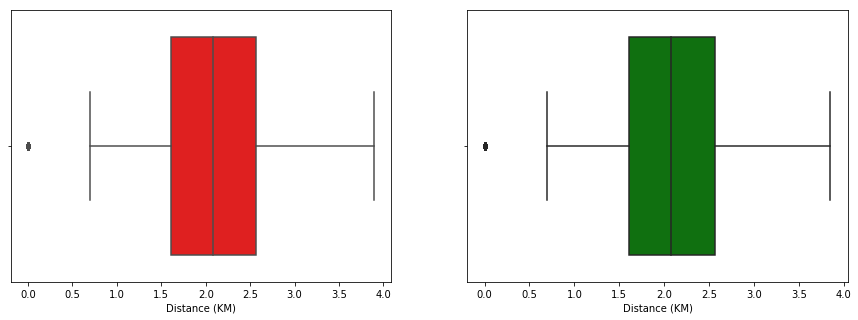

In [12]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.boxplot(train['Distance (KM)'].transform(np.log) , color = 'red')
fig.add_subplot(1, 2, 2)
sns.boxplot(test['Distance (KM)'].transform(np.log)  , color = 'green')

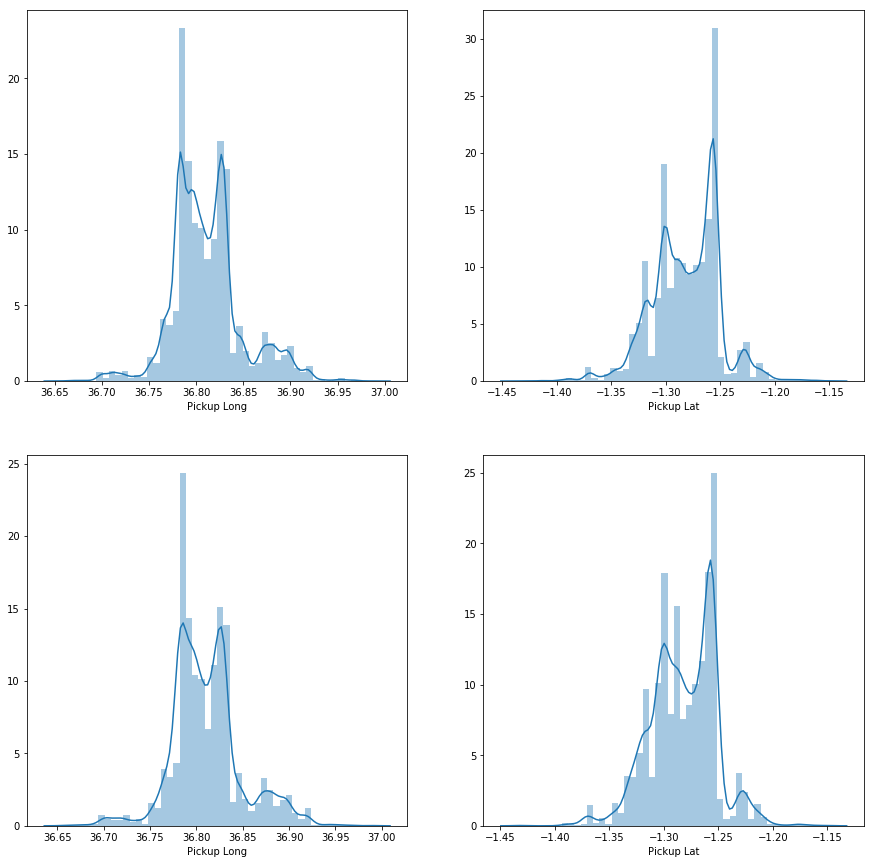

In [13]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2, 2, 1)
sns.distplot(train['Pickup Long'].dropna())
fig.add_subplot(2, 2, 2)
sns.distplot(train['Pickup Lat'].dropna())
fig.add_subplot(2, 2, 3)
sns.distplot(test['Pickup Long'].dropna())
fig.add_subplot(2, 2, 4)
sns.distplot(test['Pickup Lat'].dropna())

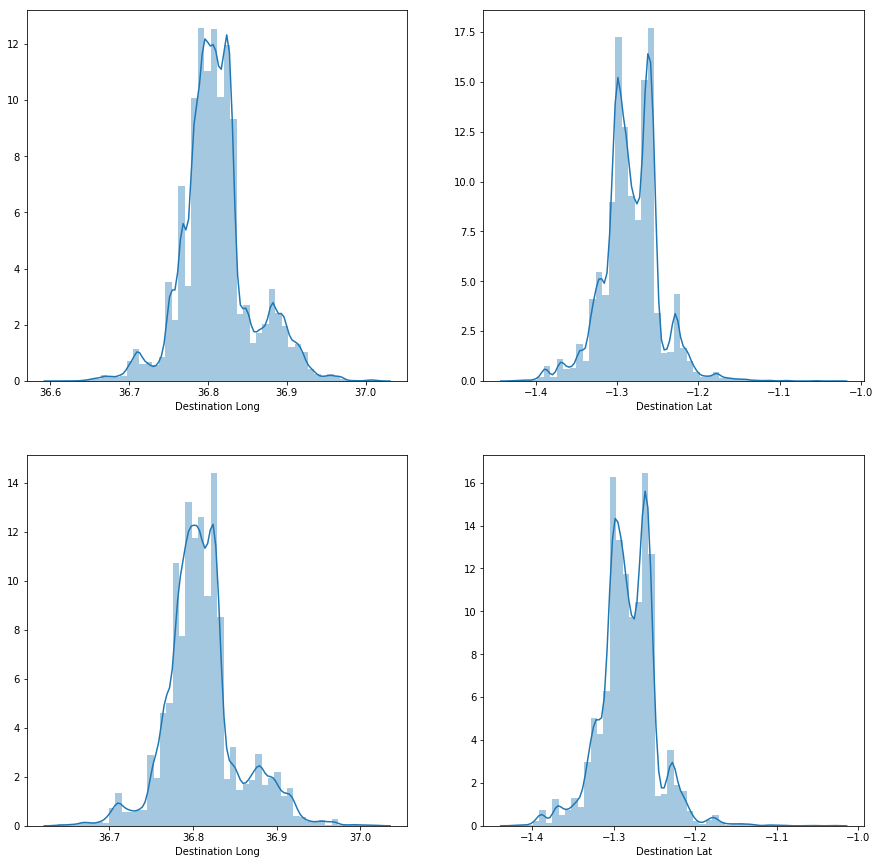

In [14]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2, 2, 1)
sns.distplot(train['Destination Long'].dropna())
fig.add_subplot(2, 2, 2)
sns.distplot(train['Destination Lat'].dropna())
fig.add_subplot(2, 2, 3)
sns.distplot(test['Destination Long'].dropna())
fig.add_subplot(2, 2, 4)
sns.distplot(test['Destination Lat'].dropna())

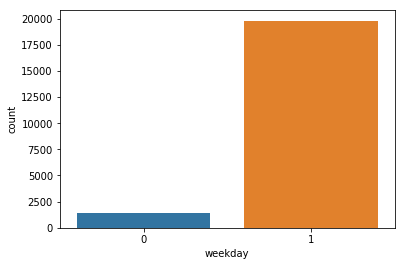

In [90]:
sns.countplot(x = 'weekday', data = train)

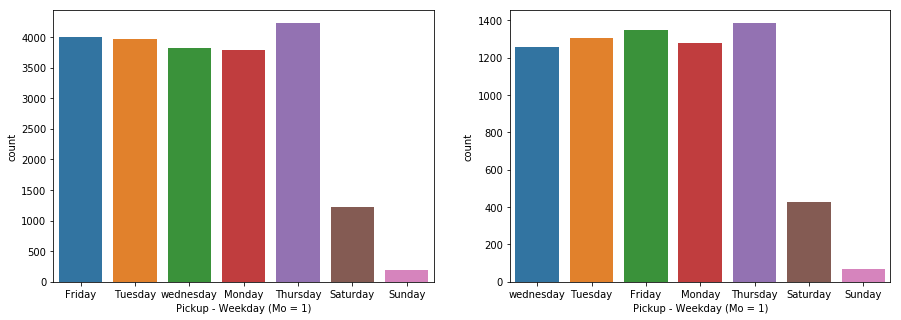

In [92]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.countplot(x = 'Pickup - Weekday (Mo = 1)', data = train)
fig.add_subplot(1, 2, 2)
sns.countplot(x = 'Pickup - Weekday (Mo = 1)', data = test)

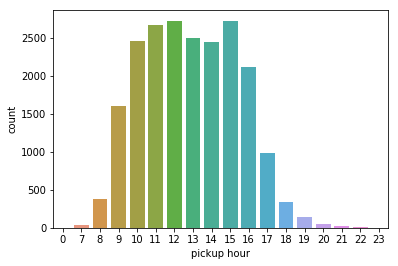

In [93]:
sns.countplot(x = 'pickup hour', data = train)

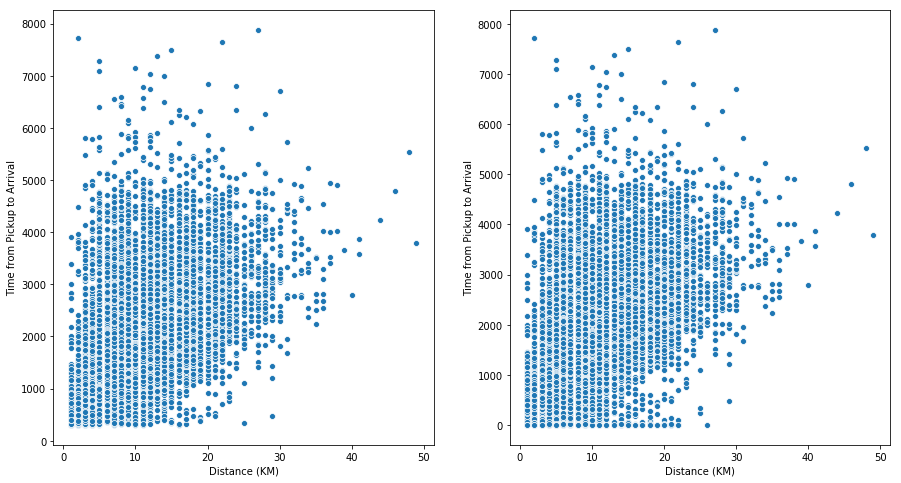

In [97]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1, 2, 1)
sns.scatterplot(new['Distance (KM)'], new['Time from Pickup to Arrival'])
fig.add_subplot(1, 2, 2)
sns.scatterplot(train['Distance (KM)'], train['Time from Pickup to Arrival'])

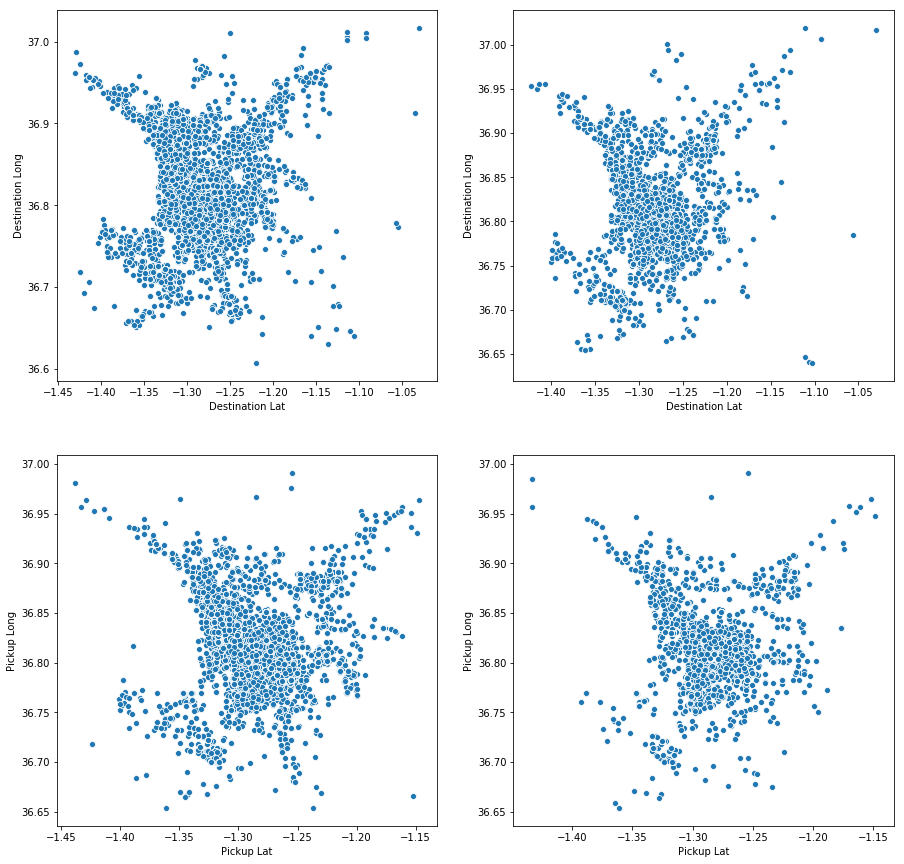

In [30]:
sns.scatterplot(new['Distance (KM)'], new['Time from Pickup to Arrival'])fig = plt.figure(figsize=(15,15))
fig.add_subplot(2, 2, 1)
sns.scatterplot(train['Destination Lat'], train['Destination Long'])
fig.add_subplot(2, 2, 2)
sns.scatterplot(test['Destination Lat'], test['Destination Long'])
fig.add_subplot(2, 2, 3)
sns.scatterplot(train['Pickup Lat'], train['Pickup Long'])
fig.add_subplot(2, 2, 4)
sns.scatterplot(test['Pickup Lat'], test['Pickup Long'])

In [68]:
train[train['Time from Pickup to Arrival'] > 7200]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
701,Order_No_18186,User_Id_111,Bike,3,Business,30,2,11:37:53 AM,30,Tuesday,11:38:52 AM,30,Tuesday,11:46:09 AM,30,Tuesday,11:50:20 AM,30,2,1:53:27 PM,13,22.3,NaN,-1.255189,36.782203,-1.327035,36.866736,Rider_Id_937,7387,2568,966,14.1,351
3169,Order_No_20387,User_Id_718,Bike,3,Business,25,3,9:37:45 AM,25,wednesday,9:38:00 AM,25,wednesday,9:44:22 AM,25,wednesday,9:49:50 AM,25,3,11:57:16 AM,22,13.7,NaN,-1.255189,36.782203,-1.330948,36.922994,Rider_Id_519,7646,1591,801,14.1,187
9820,Order_No_6135,User_Id_346,Bike,3,Business,14,4,10:17:27 AM,14,Thursday,10:17:48 AM,14,Thursday,10:34:47 AM,14,Thursday,10:40:26 AM,14,4,12:45:17 PM,15,25.2,NaN,-1.288780,36.816831,-1.216682,36.908578,Rider_Id_119,7491,1208,300,14.3,139
10585,Order_No_5837,User_Id_658,Bike,2,Personal,30,1,10:07:30 AM,30,Monday,10:08:15 AM,30,Monday,10:35:12 AM,30,Monday,10:37:36 AM,30,1,12:48:59 PM,27,22.5,NaN,-1.282795,36.768945,-1.156077,36.706736,Rider_Id_857,7883,583,742,13.7,52
12197,Order_No_27627,User_Id_2676,Bike,3,Business,5,2,11:10:23 AM,5,Tuesday,11:10:58 AM,5,Tuesday,11:16:00 AM,5,Tuesday,11:27:07 AM,5,2,1:35:41 PM,2,25.3,NaN,-1.296310,36.768822,-1.301446,36.766138,Rider_Id_365,7714,2038,1817,14.3,397
15501,Order_No_12269,User_Id_2018,Bike,1,Personal,1,1,3:21:52 PM,1,Monday,3:26:18 PM,1,Monday,3:52:54 PM,1,Monday,3:57:14 PM,1,1,5:58:31 PM,5,25.4,NaN,-1.287138,36.822796,-1.295436,36.849036,Rider_Id_612,7277,730,642,14.0,80


## Clustering

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans()

## Correlations

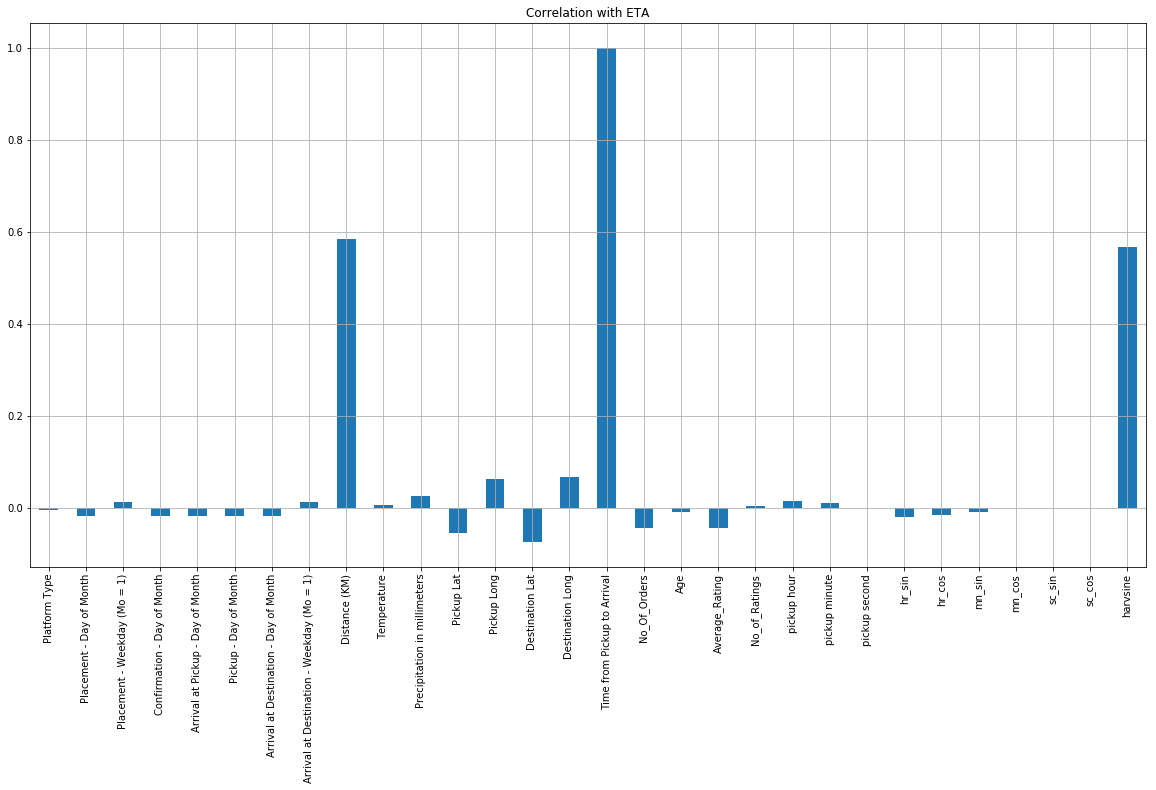

In [131]:
train.corrwith(train['Time from Pickup to Arrival']).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with ETA')

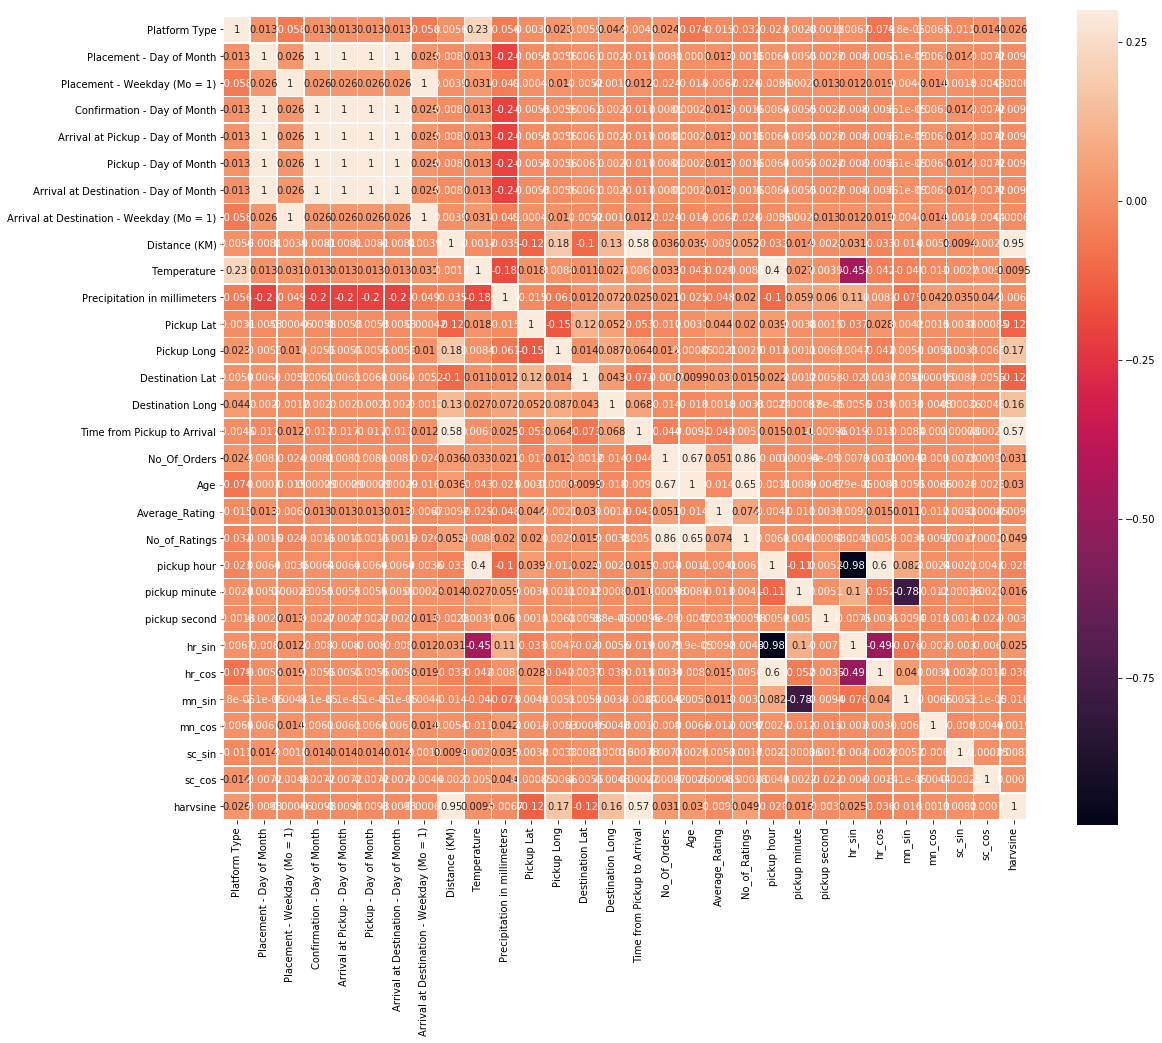

In [130]:
# correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize = (18,15))
sns.heatmap(corr, square = True, linewidths= .5, vmax = 0.3 , annot=True)

In [86]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,pickup hour,pickup minute,pickup second,weekday,hr_sin,hr_cos,mn_sin,mn_cos,sc_sin,sc_cos
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,Friday,9:40:10 AM,9,Friday,10:04:47 AM,9,Friday,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,10,27,30,1,0.500000,-0.866025,0.309017,-0.951057,1.224647e-16,-1.000000
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,Friday,3:41:30 PM,18,Friday,4:07:16 PM,18,Friday,4:13:37 PM,18,5,5:01:43 PM,20,24.5,NaN,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549,16,13,37,1,-0.866025,-0.500000,0.978148,0.207912,-6.691306e-01,-0.743145
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,Friday,1:12:49 PM,31,Friday,1:20:02 PM,31,Friday,1:33:08 PM,31,5,2:16:43 PM,6,24.7,NaN,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549,13,33,8,1,-0.258819,-0.965926,-0.309017,-0.951057,7.431448e-01,0.669131
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,Tuesday,7:12:29 AM,2,Tuesday,7:35:24 AM,2,Tuesday,7:38:46 AM,2,2,8:28:32 AM,18,15.2,NaN,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549,7,38,46,1,0.965926,-0.258819,-0.743145,-0.669131,-9.945219e-01,0.104528
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,Tuesday,10:42:24 AM,22,Tuesday,10:56:00 AM,22,Tuesday,10:59:40 AM,22,2,11:26:22 AM,7,19.2,NaN,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549,10,59,40,1,0.500000,-0.866025,-0.104528,0.994522,-8.660254e-01,-0.500000


In [0]:
from math import radians, cos, sin, asin, sqrt

def haversine(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [row['Pickup Long'], row['Pickup Lat'] ,row['Destination Long'] , row['Destination Lat']])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [0]:
distance = train.apply(haversine, axis = 1)

In [0]:
train['harvsine'] = distance

In [143]:
train.shape

(21155, 43)

In [144]:
(train['Pickup - Weekday (Mo = 1)'].values == train['Arrival at Destination - Weekday (Mo = 1)'].values).sum()

21155

In [0]:
def weekday(day):
  if day in ['Saturday', 'Sunday']:
    return 0
  else:
    return 1
    
train['weekday']  = train['Pickup - Weekday (Mo = 1)'].apply(weekday)

In [0]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [0]:
# getting features ready
dataset = train.drop(['Order No', 'User Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Temperature',
       'Precipitation in millimeters', 'Rider Id'] , axis = 1)

test = test.drop(['Order No', 'User Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Temperature',
       'Precipitation in millimeters', 'Rider Id'] , axis = 1)

In [0]:
print(dataset.shape)
print(test.shape)

(21201, 13)
(7068, 12)


In [0]:
dataset['Platform Type']  ='Type_' + dataset['Platform Type'].astype(str)
test['Platform Type']  ='Type_' + test['Platform Type'].astype(str)

In [0]:
dataset['Arrival at Pickup - Weekday (Mo = 1)']  ='Day_' + dataset['Arrival at Pickup - Weekday (Mo = 1)'].astype(str)
test['Arrival at Pickup - Weekday (Mo = 1)']  ='Day_' + test['Arrival at Pickup - Weekday (Mo = 1)'].astype(str)

In [0]:
dataset['Distance (KM)']  = dataset['Distance (KM)'].transform(np.log)
test['Distance (KM)']  = test['Distance (KM)'].transform(np.log)

In [0]:
dataset.head()

,Platform Type,Personal or Business,Arrival at Pickup - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Type_3,Business,Day_5,4,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,Type_3,Personal,Day_5,20,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,Type_3,Business,Day_5,6,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,Type_3,Personal,Day_2,18,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,Type_2,Personal,Day_2,7,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


In [0]:
dataset = pd.get_dummies(dataset, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [0]:
# correlation matrix
corr = dataset.corr()
f, ax = plt.subplots(figsize = (18,15))
sns.heatmap(corr, square = True, linewidths= .5, vmax = 0.3 , annot=True)

In [0]:
X = dataset.drop(['Time from Pickup to Arrival'] , axis  = 1)
y = dataset['Time from Pickup to Arrival']

In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [0]:
# Standerdise the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
test = scaler.transform(test)

In [0]:
from sklearn.metrics import mean_squared_error
def evaluate(reg):
    ypred = reg.predict(x_test)
    mse = mean_squared_error(y_test, ypred)
    rmse = np.sqrt(mse)
    print('The RMSE is {}'.format(rmse))

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 818.7841631754179


In [0]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 869.3577136000354


In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 793.2564133790476


In [0]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(x_train, y_train)
evaluate(svr_regressor)

The RMSE is 907.8257738933032


In [0]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(x_train, y_train)
evaluate(tree_regressor)

The RMSE is 1118.1405446682286


In [0]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 820.2265925225352


In [0]:
from xgboost import XGBRegressor
regressor = XGBRegressor(objective = 'reg:squarederror')
regressor.fit(x_train, y_train)
evaluate(regressor)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


The RMSE is 785.8407677609488


In [0]:
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 818.8353030345871


In [0]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(15,), random_state=1, max_iter=1000, warm_start=True)
regressor.fit(x_train, y_train)
evaluate(regressor)

In [0]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 818.7836627001755


In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))


NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.3))

NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

W0824 16:29:23.445162 140297368532864 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [0]:
NN_model.fit(x_train, y_train, epochs=103, batch_size=128, validation_split = 0.2)

In [0]:
evaluate(NN_model)

The RMSE is 816.6153189272637


In [0]:
dep_var = 'Time from Pickup to Arrival'
cat_names = ['Platform Type', 'Personal or Business']
cont_names = ['Distance (KM)', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']
procs = [FillMissing, Categorify, Normalize]

In [0]:
dataset['Time from Pickup to Arrival'] = dataset['Time from Pickup to Arrival'].astype(np.float32)

In [0]:
dataset.head()

,Platform Type,Personal or Business,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,Type_3,Business,4,-1.317755,36.830370,-1.300406,36.829741,745.0
1,Type_3,Personal,16,-1.351453,36.899315,-1.295004,36.814358,1993.0
2,Type_3,Business,3,-1.308284,36.843419,-1.300921,36.828195,455.0
3,Type_3,Business,9,-1.281301,36.832396,-1.257147,36.795063,1341.0
4,Type_1,Personal,9,-1.266597,36.792118,-1.295041,36.809817,1214.0


In [0]:
test_data = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:
data = (TabularList.from_df(dataset, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(valid_pct = 0.3, seed = 42)
                           .label_from_df(cols = dep_var, label_cls = FloatList, log = False )
                           .add_test(test_data)
                           .databunch())

In [0]:
data.show_batch(rows=10)

Platform Type,Personal or Business,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,target
Type_3,Business,-0.9763,0.0685,-1.0733,-0.3987,-0.9457,612.0
Type_3,Business,1.3192,0.8009,-0.4242,-0.1027,1.9277,4484.0
Type_3,Personal,-0.6232,0.4041,-0.1461,-0.6038,-0.7629,998.0
Type_1,Business,0.4363,-1.6909,1.5917,-3.0542,2.8149,1675.0
Type_3,Business,-1.5061,0.5438,0.0431,0.4282,0.0472,201.0
Type_3,Business,0.4363,-1.5603,2.0167,-0.5313,0.3798,1393.0
Type_3,Business,-0.2700,-0.7194,-0.8683,0.4626,0.1149,1458.0
Type_3,Business,-0.9763,-0.8566,0.8866,-0.5165,0.4143,484.0
Type_3,Business,-0.0934,0.2802,0.0078,-1.4081,0.2624,2103.0
Type_3,Business,2.3787,0.8650,-0.7665,-1.7948,1.9919,3119.0


In [0]:
learn = tabular_learner(data, layers=[200,100], ps = [0.2, 0.3], metrics=rmse)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


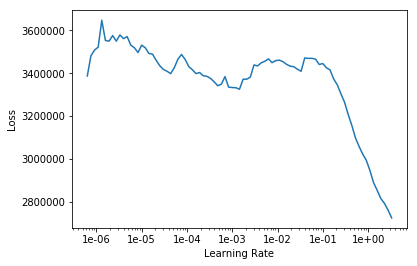

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,3443999.750000,3405274.000000,1838.930054,00:02
1,3376824.500000,3394421.500000,1836.006714,00:02
2,3351363.250000,3354541.250000,1825.195923,00:02
3,3256798.000000,3240775.500000,1793.949097,00:02
4,3022171.000000,2973120.000000,1718.064819,00:02
5,2607707.250000,2492527.500000,1572.548218,00:02
6,1975780.500000,1919965.250000,1378.386963,00:02
7,1419944.500000,1270140.625000,1117.307739,00:02
8,930597.937500,814742.562500,889.062561,00:02
9,700888.062500,650776.750000,792.604797,00:02


In [0]:
preds, targets = learn.get_preds(DatasetType.Test)

In [0]:
labels = [p[0].data.item() for p in preds]

In [0]:
submission = pd.DataFrame({'Order_No': orders, 'Time from Pickup to Arrival': labels})
submission.to_csv('submission_4.csv', index=False)
submission.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1159.737793
1,Order_No_12736,1256.650391
2,Order_No_768,1193.666016
3,Order_No_15332,1247.987305
4,Order_No_21373,1290.644653


## Making Submission

In [0]:
test_data = pd.read_csv('Test.csv')

In [0]:
orders = test_data['Order No']
prediction = regressor.predict(test)
all_data = list(zip(orders, prediction.reshape(1,-1)[0].astype('float32')))

In [0]:
final_result = pd.DataFrame(all_data, columns=['Order_No', 'Time from Pickup to Arrival'])
final_result.to_csv('final_xgb_rider.csv', index =False)
final_result.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1456.054199
1,Order_No_12736,2553.135010
2,Order_No_768,1669.879517
3,Order_No_15332,2155.980469
4,Order_No_21373,2160.895752
